In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import tensorflow as tf
from sklearn.datasets import load_sample_image

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

### Understanding our Data
We are going to use sample images from sklearn's datasets and try to understand the elemetary concepts in Convolutional Neural Networks

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


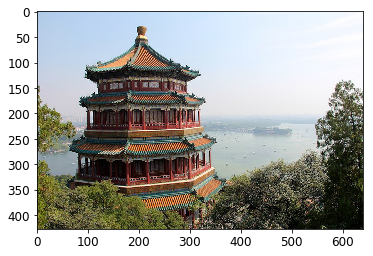

In [3]:
china = load_sample_image("china.jpg")
height,width,channels = china.shape
plt.imshow(china)

In [4]:
print(height, width, channels)

427 640 3


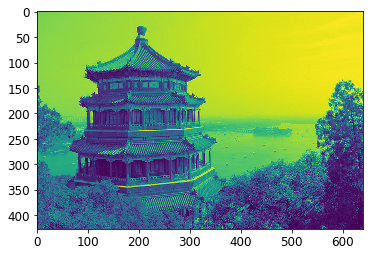

In [5]:
china_grayscale = china.mean(axis=2).astype(np.float32) #compute mean along the channels to get the grayscale
plt.imshow(china_grayscale)#, cmap="gray")

### Understanding Convolution

> Now we know what kind of data we are dealing with here, so we can start start understanding what convolution really is.

In [6]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(dataset.shape)

(2, 427, 640, 3)


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/datasets/base.py:762: Deprecati

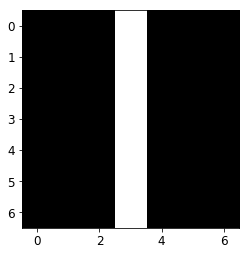

In [7]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# [filter_height, filter_width, in_channels, out_channels]
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
plt.imshow(filters[:,:,:,0])

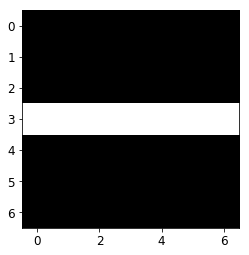

In [8]:
plt.imshow(filters[:,:,:,1])

In [9]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
# [batch, in_height, in_width, in_channels] 
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

![](https://discourse-cdn-sjc1.com/business6/uploads/analyticsvidhya/original/2X/0/03c1f6ce34af21f30fa91f00d5ba1899dfdcd411.gif)

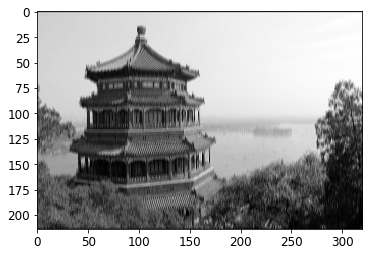

In [10]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 0], cmap="gray")

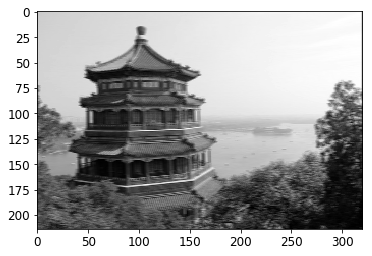

In [11]:
plt.imshow(output[0, :, :, 1], cmap="gray")

### Using Tensorflow's inbuilt functions and filters for Convolution

In [12]:
reset_graph()

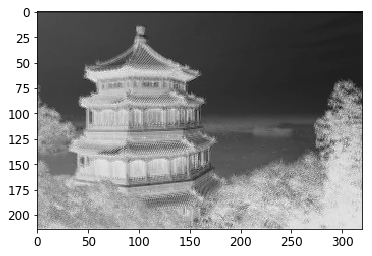

In [36]:
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray")

### Summarization using Pooling
> Pooling is nothing but down sampling its input representation to reduce it's dimensionality.
>> We are not looking at overlapping unlike the strides performed during the convolution we performed above.

Pooling is also allows the final image to be less sensitive to local translation
![](https://qph.ec.quoracdn.net/main-qimg-40cdeb3b43594f4b1b1b6e2c137e80b7)

SAME PADDED


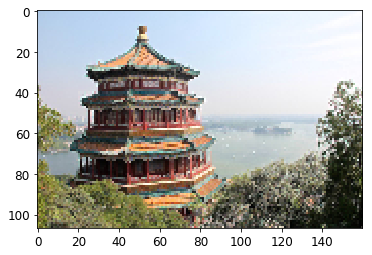

ORIGINAL


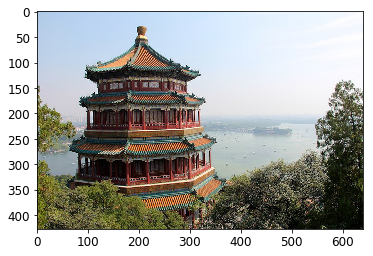

In [39]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,4,4,1],padding="SAME")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

print("SAME PADDED")
plt.imshow(output[0].astype(np.uint8)) 
plt.show()

print("ORIGINAL")
plt.imshow(dataset[0].astype(np.uint8))
plt.show()